### ch3. DNN

- 학습 날짜 : 2019 - 07 - 01

### 3.1 DNN 원리

- DNN은 은닉 계층이 여러 개인 인공신경망

### 3.1.1 DNN 개념과 구조

- 은닉 계층이 여러 개인 신경망
- 보다 더 정교하게 신호 처리 가능
- 복잡도가 높은 비정형 빅데이터에 용이
- 과적합을 얼마나 방지하느냐가 열쇠

### 3.1.2 경사도 소실 문제와 ReLu 활성화 함수

**vanishing gradient probelm**
- 경사소 소실 문제
- DNN은 여러 계층으로 구성되어 있고, 각 계층 사이에 활성화 함수가 반복적으로 들어 있어 오차역전파를 계산할 때 경사도 계산이 누적
- 이로 인해 성능이 나빠질 수 있음
- 시그모이드 함수 같이 입력을 특정 범위로 줄이는 활성화 함수들은 입력이 크면 경사도가 매우 작아져 경사도 소실 유발 가능성 높음

**ReLu 활성화 함수**
- 경사도 소실 문제를 극복하기 위해 사용
- 0 이하는 0의 값, 그 이상은 비례관계로 구성

### 3.1.3 DNN 구현 단계

1. 기본 파라미터 설정
2. 분류 DNN 모델 구현
3. 데이터 준비
4. DNN의 학습 및 성능 평가

### 3.2 필기체를 분류하는 DNN 구현

In [1]:
from keras import layers, models

Using TensorFlow backend.


In [2]:
# load data

import numpy as np
from keras import datasets #mnist
from keras.utils import np_utils #to_categorical

In [10]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_1, Nout):
        super().__init__()
        
        # add hidden layer - 1
        self.add(layers.Dense(
            Nh_1[0],
            activation='relu',
            input_shape=(Nin,),
            name='Hidden-1'
        ))
        
        # dropout node at probability 0.2
        self.add(layers.Dropout(0.2))
        
        # add hidden layer - 2, input 별도 설정 필요 없다. 알아서 잡아줌
        self.add(layers.Dense(
            Nh_1[1],
            activation='relu',
            name='Hidden-2'
        ))
        
        # dropout node at probability 0.2
        self.add(layers.Dropout(0.2))
        
        self.add(layers.Dense(Nout, activation='softmax'))
        
        self.compile(
            loss='categorical_crossentropy', # 분류할 클래스가 2개 이상이므로 사용
            optimizer='adam', # 최적화 방법
            metrics=['accuracy'] # 정확성
        )

In [12]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [16]:
def main():
    Nin = 784
    Nh_1 = [100, 50]
    number_of_class = 10
    Nout = number_of_class
    
    model = DNN(Nin, Nh_1, Nout)
    
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    history = model.fit(
        X_train, 
        y_train, 
        epochs=100, 
        batch_size=100, 
        validation_split=0.2
    )
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performance_test)
    

if __name__=="__main__":
    main()

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 53us/step - loss: 0.5379 - acc: 0.8373 - val_loss: 0.1970 - val_acc: 0.9423
Epoch 2/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.2399 - acc: 0.9287 - val_loss: 0.1410 - val_acc: 0.9578
Epoch 3/100
48000/48000 [==============================] - 2s 49us/step - loss: 0.1853 - acc: 0.9448 - val_loss: 0.1199 - val_acc: 0.9635
Epoch 4/100
48000/48000 [==============================] - 2s 38us/step - loss: 0.1542 - acc: 0.9530 - val_loss: 0.1092 - val_acc: 0.9673
Epoch 5/100
48000/48000 [==============================] - 2s 40us/step - loss: 0.1377 - acc: 0.9582 - val_loss: 0.0995 - val_acc: 0.9700
Epoch 6/100
48000/48000 [==============================] - 2s 45us/step - loss: 0.1170 - acc: 0.9646 - val_loss: 0.0980 - val_acc: 0.9701
Epoch 7/100
48000/48000 [==============================] - 2s 36us/step - loss: 0.1090 - acc: 0.9665 - val_loss: 0.0903 - 

48000/48000 [==============================] - 2s 37us/step - loss: 0.0264 - acc: 0.9912 - val_loss: 0.1166 - val_acc: 0.9771
Epoch 60/100
48000/48000 [==============================] - 2s 43us/step - loss: 0.0275 - acc: 0.9912 - val_loss: 0.1086 - val_acc: 0.9773
Epoch 61/100
48000/48000 [==============================] - 2s 34us/step - loss: 0.0290 - acc: 0.9903 - val_loss: 0.1128 - val_acc: 0.9773
Epoch 62/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.0291 - acc: 0.9909 - val_loss: 0.1131 - val_acc: 0.9756
Epoch 63/100
48000/48000 [==============================] - 2s 43us/step - loss: 0.0286 - acc: 0.9904 - val_loss: 0.1150 - val_acc: 0.9770
Epoch 64/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.0266 - acc: 0.9918 - val_loss: 0.1148 - val_acc: 0.9764
Epoch 65/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.0267 - acc: 0.9916 - val_loss: 0.1083 - val_acc: 0.9772
Epoch 66/100
48000/48000 [==============

### 3.3 컬러 이미지를 분류하는 DNN 구현

#### step

1. CIFAR - 10 데이터 소개
2. 데이터 불러오기
3. DNN 모델링
4. 학습 효과 분석 준비
5. DNN 학습 및 성능 평가

### 3.3.1 CIFAR - 10 데이터 소개

- CIFAR - 10 데이터 셋은 10가지 사물이 담긴 컬러 이미지입니다. 총 6만장, 이 중 5만 장은 학습용, 1만 장은 평가용
- 사진 크기 32 * 32, RGB로 구성된 컬러 이미지이므로 32*32*3이 이미지 한 장당 원소수

### 3.3.2 데이터 불러오기

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets
from keras.utils import np_utils # for to_categorical()

%matplotlib inline

In [4]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    
    # 목표값은 0~9까지 정수값으로 저장 되어 있어서 to_categorical()을 이용해서 10개의 원소 가진 이진 벡터로 분류
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    
    
    # 컬러값을 포함하는 이미지 배열을 DNN이 다룰 수 있도록 차원 변환
    # 컬러 이미지는 채널이 포함된 4차원이기 때문에 L, W, H, C 정보를 가져옴
    # L : 데이터 수
    # W : 이미지 넓이
    # H : 이미지 높이
    # C : 채널 수
    # DNN은 벡터 형태의 정ㅂ를 다루기 때문에 데이터의 차원을 2로 하고 첫 줄은 L로 설정하고 둘째 줄은 나머지 곱한 값
    
    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    
    return (X_train, Y_train), (X_test, Y_test)

In [5]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_1, Pd_1, Nout): # PD_1 is argument for dropout parameter
        super().__init__() # 부모 클래스 상속한 후 사용
        
        # add hidden layer - 1
        self.add(layers.Dense(
            Nh_1[0],
            activation='relu',
            input_shape=(Nin,),
            name='Hidden-1'
        ))
        
        # dropout node at probability 0.2
        self.add(layers.Dropout(Pd_1[0]))
        
        # add hidden layer - 2, input 별도 설정 필요 없다. 알아서 잡아줌
        self.add(layers.Dense(
            Nh_1[1],
            activation='relu',
            name='Hidden-2'
        ))
        
        # dropout node at probability 0.2
        self.add(layers.Dropout(Pd_1[1]))
        
        self.add(layers.Dense(Nout, activation='softmax'))
        
        self.compile(
            loss='categorical_crossentropy', # 분류할 클래스가 2개 이상이므로 사용
            optimizer='adam', # 최적화 방법
            metrics=['accuracy'] # 정확성
        )

In [6]:
def plot_loss(history):
    plt.plot(history.history['loss'])  # 실제 학습 데이터로 구한 손실값
    plt.plot(history.history['val_loss']) # 학습 데이터 일부를 사용한 검증 데이터로 구한 손실 값
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [7]:
def plot_acc(history):
    plt.plot(history.history['acc'])  # 실제 학습 데이터로 구한 손실값
    plt.plot(history.history['val_acc']) # 학습 데이터 일부를 사용한 검증 데이터로 구한 손실 값
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 7s 177us/step - loss: 1.9440 - acc: 0.2981 - val_loss: 1.8404 - val_acc: 0.3547
Epoch 2/100
40000/40000 [==============================] - 2s 62us/step - loss: 1.7773 - acc: 0.3669 - val_loss: 1.7326 - val_acc: 0.3858
Epoch 3/100
40000/40000 [==============================] - 3s 66us/step - loss: 1.6827 - acc: 0.3979 - val_loss: 1.6886 - val_acc: 0.4001
Epoch 4/100
40000/40000 [==============================] - 3s 67us/step - loss: 1.6211 - acc: 0.4227 - val_loss: 1.6325 - val_acc: 0.4184
Epoch 5/100
40000/40000 [==============================] - 3s 65us/step - loss: 1.5842 - acc: 0.4372 - val_loss: 1.6089 - val_acc: 0.4279
Epoch 6/100
40000/40000 [==============================] - 2s 60us/step - loss: 1.5566 - acc: 0.4454 - val_loss: 1.6067 - val_acc: 0.4287
E

Epoch 56/100
40000/40000 [==============================] - 3s 67us/step - loss: 1.1993 - acc: 0.5715 - val_loss: 1.5170 - val_acc: 0.4831
Epoch 57/100
40000/40000 [==============================] - 3s 68us/step - loss: 1.1961 - acc: 0.5693 - val_loss: 1.4893 - val_acc: 0.4888
Epoch 58/100
40000/40000 [==============================] - 2s 59us/step - loss: 1.1942 - acc: 0.5721 - val_loss: 1.5192 - val_acc: 0.4804
Epoch 59/100
40000/40000 [==============================] - 2s 61us/step - loss: 1.1938 - acc: 0.5719 - val_loss: 1.5105 - val_acc: 0.4865
Epoch 60/100
40000/40000 [==============================] - 2s 61us/step - loss: 1.1860 - acc: 0.5769 - val_loss: 1.5061 - val_acc: 0.4826
Epoch 61/100
40000/40000 [==============================] - 2s 58us/step - loss: 1.1885 - acc: 0.5744 - val_loss: 1.4949 - val_acc: 0.4873
Epoch 62/100
40000/40000 [==============================] - 2s 59us/step - loss: 1.1839 - acc: 0.5758 - val_loss: 1.5165 - val_acc: 0.4783
Epoch 63/100
40000/40000 [=

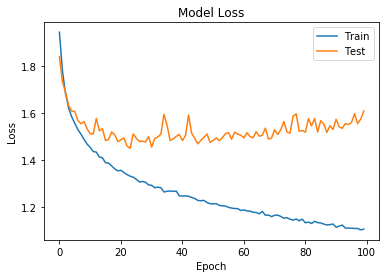

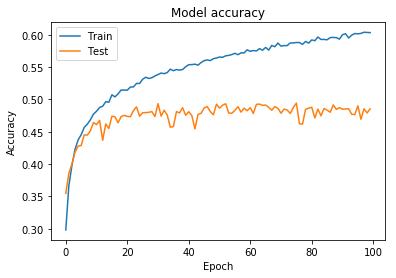

In [17]:
def main():
    Nh_1 = [100, 50]
    pd_1 = [0.0, 0.0]
    number_of_class = 10
    Nout = number_of_class
    
    
    (X_train, y_train), (X_test, y_test) = Data_func()
    # X_train.shape[1] : 길이가 (3072, )
    model = DNN(X_train.shape[1], Nh_1, pd_1, Nout)
    
    history = model.fit(
        X_train, 
        y_train, 
        epochs=100, 
        batch_size=100, 
        validation_split=0.2
    )
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    
    plot_acc(history)
    plt.show()
    

if __name__=="__main__":
    main()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 95us/step - loss: 2.0966 - acc: 0.2203 - val_loss: 1.8963 - val_acc: 0.3204
Epoch 2/100
40000/40000 [==============================] - 3s 75us/step - loss: 1.9524 - acc: 0.2861 - val_loss: 1.8530 - val_acc: 0.3382
Epoch 3/100
40000/40000 [==============================] - 3s 72us/step - loss: 1.9045 - acc: 0.3111 - val_loss: 1.8020 - val_acc: 0.3548
Epoch 4/100
40000/40000 [==============================] - 3s 66us/step - loss: 1.8795 - acc: 0.3206 - val_loss: 1.8193 - val_acc: 0.3456
Epoch 5/100
40000/40000 [==============================] - 3s 85us/step - loss: 1.8624 - acc: 0.3283 - val_loss: 1.7788 - val_acc: 0.3653
Epoch 6/100
40000/40000 [

40000/40000 [==============================] - 3s 65us/step - loss: 1.7013 - acc: 0.3931 - val_loss: 1.6414 - val_acc: 0.4139
Epoch 54/100
40000/40000 [==============================] - 3s 75us/step - loss: 1.6972 - acc: 0.3922 - val_loss: 1.6675 - val_acc: 0.4104
Epoch 55/100
40000/40000 [==============================] - 3s 74us/step - loss: 1.6990 - acc: 0.3903 - val_loss: 1.6618 - val_acc: 0.4066
Epoch 56/100
40000/40000 [==============================] - 3s 74us/step - loss: 1.6921 - acc: 0.3946 - val_loss: 1.6520 - val_acc: 0.4139
Epoch 57/100
40000/40000 [==============================] - 3s 66us/step - loss: 1.6917 - acc: 0.3961 - val_loss: 1.6783 - val_acc: 0.3907
Epoch 58/100
40000/40000 [==============================] - 3s 81us/step - loss: 1.6976 - acc: 0.3922 - val_loss: 1.6380 - val_acc: 0.4143
Epoch 59/100
40000/40000 [==============================] - 3s 75us/step - loss: 1.6963 - acc: 0.3930 - val_loss: 1.6467 - val_acc: 0.4155
Epoch 60/100
40000/40000 [==============

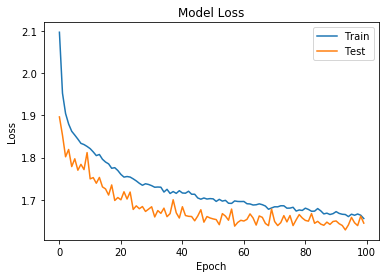

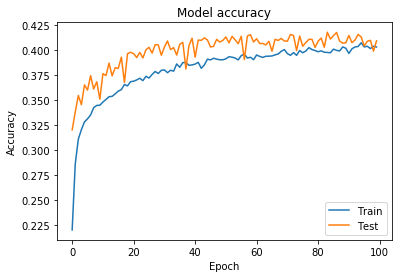

In [8]:
# dropout : pd_1 = [0.05, 0.5]

def main():
    Nh_1 = [100, 50]
    pd_1 = [0.05, 0.5]
    number_of_class = 10
    Nout = number_of_class
    
    
    (X_train, y_train), (X_test, y_test) = Data_func()
    # X_train.shape[1] : 길이가 (3072, )
    model = DNN(X_train.shape[1], Nh_1, pd_1, Nout)
    
    history = model.fit(
        X_train, 
        y_train, 
        epochs=100, 
        batch_size=100, 
        validation_split=0.2
    )
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    
    plot_acc(history)
    plt.show()
    

if __name__=="__main__":
    main()